In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [19]:
df = pd.read_csv('fifa_300.csv')

In [20]:
df.head()

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
0,90,93,32,76,93,63,85,95,80,95,85,88,2
1,89,90,30,90,95,95,90,68,59,93,77,71,2
2,92,84,25,84,95,82,80,61,53,90,75,62,2
3,82,90,30,84,91,60,84,69,80,92,77,77,2
4,91,90,31,11,48,35,70,78,83,12,15,25,0


In [21]:
df=df[["pas accuracy","shooting","strength","heading_accuracy","forvet"]]

In [22]:
df.head()

,pas accuracy,shooting,strength,heading_accuracy,forvet
0,90,93,80,88,2
1,89,90,59,71,2
2,92,84,53,62,2
3,82,90,80,77,2
4,91,90,83,25,0


In [23]:
# total number of rows=17994 + 1
len(df.index)

300

In [24]:
def change_forvet(f):
    if f == 2:
        return 'good'
    elif f == 1:
        return 'average'
    else:
        return 'bad'
   

In [25]:
df['forvet'] = df['forvet'].apply(change_forvet)

In [26]:
def plot_decision_tree(clf,feature_name,path,target_name):
    f = io.StringIO()  
    tree.export_graphviz(clf, out_file=f,  
                         feature_names=feature_name,  
                         class_names=target_name,filled=True, rounded=True, special_characters=True)  
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

In [27]:
train, test = train_test_split(df, test_size = 0.30)

In [28]:
train

,pas accuracy,shooting,strength,heading_accuracy,forvet
182,87,66,85,64,bad
20,84,90,78,15,bad
28,71,74,57,54,average
221,63,35,77,81,bad
149,86,79,73,16,bad
286,82,80,65,15,bad
265,30,41,90,89,bad
214,77,79,74,76,good
74,72,75,75,61,average
94,78,42,85,81,bad


In [29]:
test

,pas accuracy,shooting,strength,heading_accuracy,forvet
61,90,82,42,35,good
78,84,79,80,13,bad
159,70,68,39,42,average
200,73,49,82,72,bad
266,53,81,90,90,good
1,89,90,59,71,good
86,74,71,65,60,average
180,79,69,79,74,average
55,88,87,67,49,good
284,82,83,51,10,bad


In [30]:
X_train = train.loc[:, train.columns != 'forvet']
Y_train = train.forvet
X_test = test.loc[:, test.columns != 'forvet']
Y_test = test.forvet

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [32]:
train.columns[4]

'forvet'

In [33]:
labels = ['average', 'bad', 'good']

C:\Users\egede\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


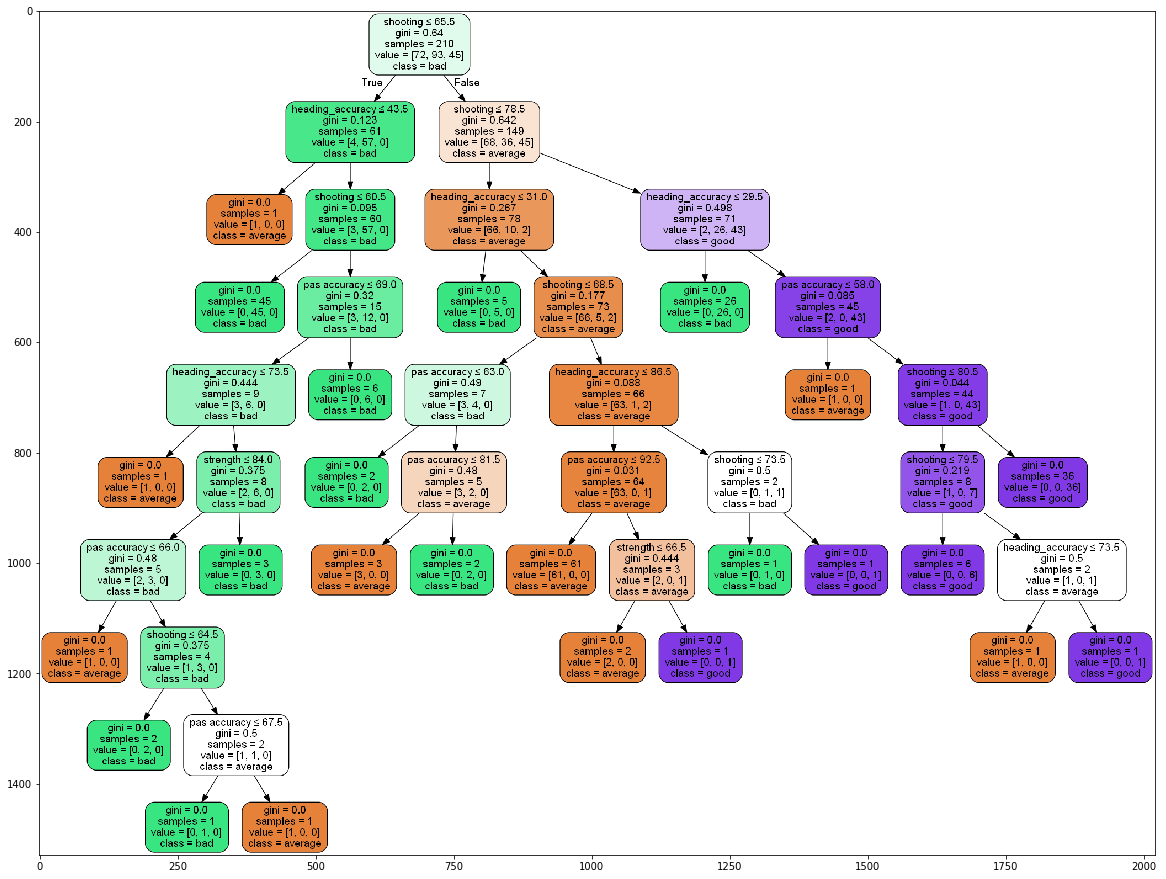

In [34]:
plot_decision_tree(clf, X_train.columns,'dt_common2.png',labels)

In [35]:
Y_test

61        good
78         bad
159    average
200        bad
266       good
1         good
86     average
180    average
55        good
284        bad
167    average
249    average
155       good
187        bad
191    average
53     average
82     average
225       good
227    average
131        bad
23        good
125    average
110       good
260        bad
112    average
199    average
77     average
10     average
3         good
127       good
        ...   
232    average
287        bad
25         bad
13        good
115    average
121       good
281    average
192    average
251       good
152        bad
135        bad
145        bad
102       good
39     average
37     average
69     average
35     average
264    average
285    average
140    average
16        good
133    average
294       good
141        bad
218    average
113    average
98        good
194        bad
238       good
40     average
Name: forvet, Length: 90, dtype: object

In [36]:
y_pred = clf.predict(X_test)

In [37]:
y_pred

array(['good', 'bad', 'average', 'bad', 'average', 'good', 'average',
       'average', 'good', 'bad', 'average', 'good', 'good', 'average',
       'average', 'bad', 'average', 'good', 'average', 'bad', 'good',
       'average', 'average', 'bad', 'average', 'good', 'good', 'bad',
       'good', 'good', 'good', 'average', 'average', 'average', 'bad',
       'average', 'bad', 'average', 'good', 'average', 'bad', 'bad',
       'good', 'average', 'average', 'bad', 'good', 'average', 'bad',
       'good', 'average', 'bad', 'bad', 'bad', 'bad', 'average', 'bad',
       'bad', 'bad', 'average', 'average', 'bad', 'bad', 'good', 'bad',
       'good', 'average', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'average', 'good', 'good', 'good', 'average', 'average', 'average',
       'good', 'average', 'good', 'bad', 'average', 'good', 'good', 'bad',
       'good', 'good'], dtype=object)

In [38]:
score = accuracy_score (Y_test, y_pred)*100

In [39]:
print("Accuracy using Decision Tree", round(score), "%")

Accuracy using Decision Tree 80.0 %


In [40]:
df.ix[289]

C:\Users\egede\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


pas accuracy          72
shooting              82
strength              86
heading_accuracy      83
forvet              good
Name: 289, dtype: object

In [41]:
df.ix[56]

pas accuracy         66
shooting             58
strength             82
heading_accuracy     82
forvet              bad
Name: 56, dtype: object